## Import Library yang ingin Digunakan

In [3]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.cluster import KMeans

Perintah import pandas as pd digunakan untuk mengimpor library Pandas dengan alias pd, import matplotlib.pyplot as plt digunakan untuk mengimpor modul pyplot dari library Matplotlib dengan alias plt, import seaborn as sns digunakan untuk mengimpor library Seaborn dengan alias sns, dan from sklearn.cluster import KMeans digunakan untuk mengimpor modul KMeans dari library scikit-learn.

## Read Dataset

In [11]:
Fathur = pd.read_csv ('Shop Customers Data.csv')
Fathur.head()

,CustomerID,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size
0,1,Male,19,15000,39,Healthcare,1,4
1,2,Male,21,35000,81,Engineer,3,3
2,3,Female,20,86000,6,Engineer,1,1
3,4,Female,23,59000,77,Lawyer,0,2
4,5,Female,31,38000,40,Entertainment,2,6


Source code di atas digunakan untuk membaca file data dalam format CSV dengan nama file 'Shop Customers Data.csv' dan menyimpannya ke dalam variabel Fathur menggunakan library Pandas. Kemudian, perintah Fathur.head() digunakan untuk menampilkan lima baris pertama dari data yang telah dibaca. Dengan demikian, source code tersebut mempersiapkan data untuk dilakukan analisis lebih lanjut menggunakan library Pandas

## Persiapan Dataset

In [12]:
Fathur.rename (index=str, columns={
    'Annual Income ($)' : 'Income',
    'Spending Score (1-100)' : 'Score'
}, inplace=True)

Source code Fathur.rename(index=str, columns={'Annual Income ($)' : 'Income', 'Spending Score (1-100)' : 'Score'}, inplace=True) digunakan untuk mengganti nama kolom dalam sebuah DataFrame. Dalam hal ini, kolom 'Annual Income ($)' diganti namanya menjadi 'Income', dan kolom 'Spending Score (1-100)' diganti namanya menjadi 'Score'. Parameter inplace=True digunakan untuk mengubah DataFrame asli, bukan membuat salinan yang diubah. Dengan demikian, source code tersebut memodifikasi nama kolom dalam DataFrame Fathur.

## Drop Kolom yang tidak Dipakai

In [14]:
dataset_baru = Fathur.drop (['CustomerID','Gender','Profession'], axis=1)
dataset_baru

,Age,Income,Score,Work Experience,Family Size
0,19,15000,39,1,4
1,21,35000,81,3,3
2,20,86000,6,1,1
3,23,59000,77,0,2
4,31,38000,40,2,6
...,...,...,...,...,...
494,34,135115,54,1,7
495,85,179877,17,12,4
496,83,93351,65,1,1
497,12,84547,96,3,3


Source code dataset_baru = Fathur.drop(['CustomerID','Gender','Profession'], axis=1) digunakan untuk menghapus kolom 'CustomerID', 'Gender', dan 'Profession' dari DataFrame Fathur dan menyimpan hasilnya ke dalam variabel baru bernama dataset_baru. Parameter axis=1 digunakan untuk menunjukkan bahwa yang dihapus adalah kolom, bukan baris. Dengan demikian, source code tersebut mempersiapkan data yang akan digunakan untuk analisis lebih lanjut dengan menghilangkan kolom yang tidak diperlukan

## Menentukan Jumlah Cluster denga Elbow

C:\Users\HP\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


Text(0, 0.5, 'Inertia')

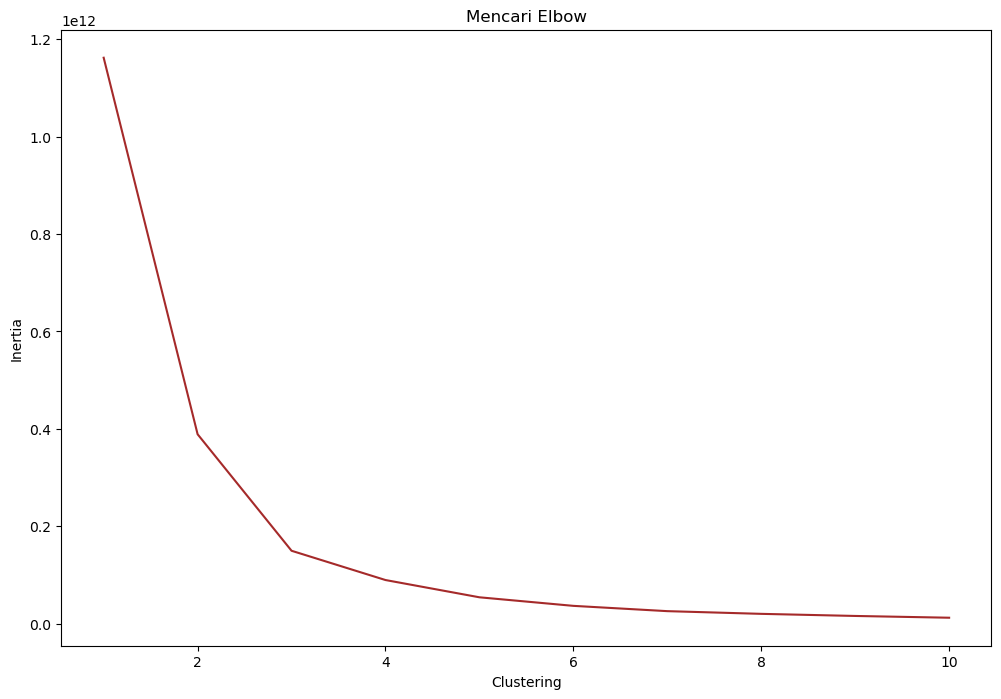

In [8]:
clustering = []
for i in range (1,11) :
    kmeans = KMeans (n_clusters=i).fit (dataset_baru)
    clustering.append (kmeans.inertia_)
    
fig, ax = plt.subplots (figsize = (12,8))
sns.lineplot (x=list(range(1,11)), y=clustering, ax=ax, color='brown')
ax.set_title ('Mencari Elbow')
ax.set_xlabel ('Clustering')
ax.set_ylabel ('Inertia')

Source code di atas digunakan untuk melakukan analisis elbow dalam metode K-Means Clustering. Pertama, dilakukan iterasi untuk mencari jumlah klaster yang optimal. Selama iterasi, model KMeans dilatih dengan jumlah klaster yang berbeda (antara 1 hingga 10) dan inertia dari setiap model disimpan. Selanjutnya, dilakukan visualisasi dengan membuat line plot dari jumlah klaster versus inertia untuk mencari "siku" (elbow) dalam grafik, yang menunjukkan jumlah klaster optimal. Hal ini membantu dalam menentukan jumlah klaster yang tepat untuk analisis klastering selanjutnya

## Proses Clustering

In [9]:
n_clustering = 4
kmean = KMeans (n_clusters=n_clustering).fit(dataset_baru)
dataset_baru ['Labels'] = kmean.labels_

Source code di atas digunakan untuk melakukan K-Means Clustering dengan 4 klaster pada dataset baru. Langkah pertama, model KMeans dengan 4 klaster diinisialisasi dan dilatih menggunakan dataset baru. Selanjutnya, hasil klasterisasi (label klaster untuk setiap sampel) disimpan ke dalam kolom 'Labels' dalam dataset baru. Dengan demikian, source code tersebut mengelompokkan data ke dalam 4 klaster dan menambahkan label klaster ke dalam dataset baru

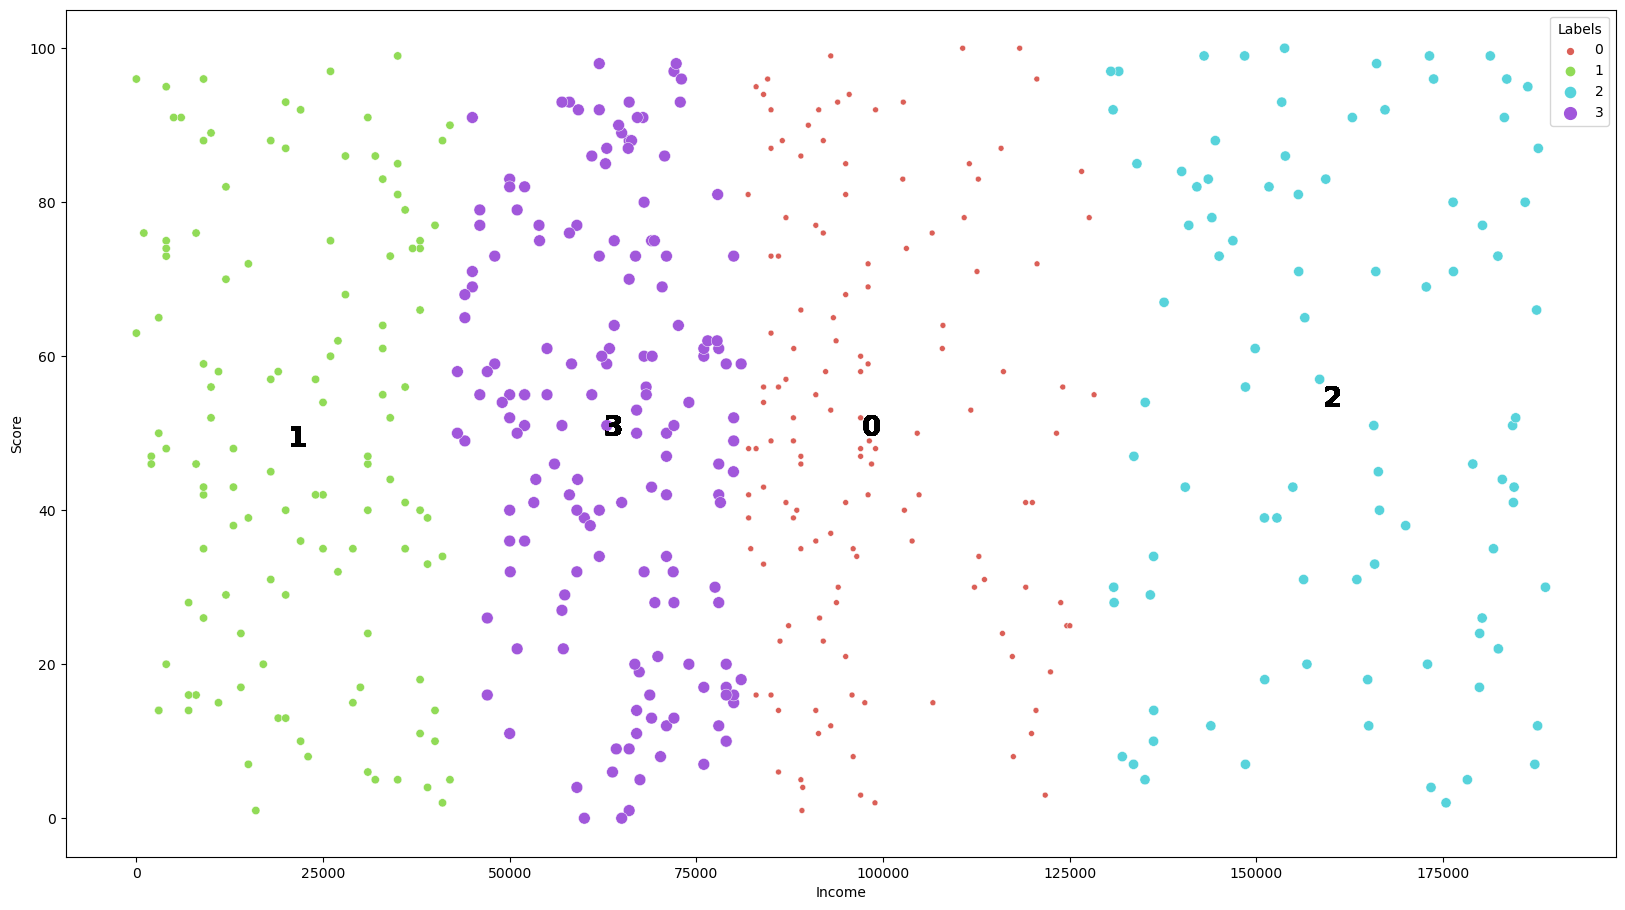

In [10]:
plt.figure(figsize=(20, 11))

# Pastikan 'Income', 'Age', dan 'Labels' ada dalam DataFrame X
sns.scatterplot(x=dataset_baru['Income'], y=dataset_baru['Score'], hue=dataset_baru['Labels'], markers=True, 
                size=dataset_baru['Labels'], palette=sns.color_palette('hls', n_clustering))

for label in dataset_baru['Labels']:
    plt.annotate(label,
                 (dataset_baru[dataset_baru['Labels']==label]['Income'].mean(),
                  dataset_baru[dataset_baru['Labels']==label]['Score'].mean()),
                  horizontalalignment='center',
                  verticalalignment='center',
                  size=20, weight='bold',
                  color='black')

plt.show()

Source code di atas digunakan untuk membuat scatter plot dari dataset baru yang telah dikelompokkan ke dalam 4 klaster menggunakan K-Means Clustering. Pertama, ukuran plot diatur menggunakan plt.figure(figsize=(20, 11)). Selanjutnya, scatter plot dibuat dengan sumbu x adalah 'Income', sumbu y adalah 'Score', dan warna serta ukuran titik-titik pada plot menunjukkan label klaster. Selain itu, label klaster ditambahkan ke dalam plot menggunakan plt.annotate(). Dengan demikian, source code tersebut memvisualisasikan hasil klasterisasi dari dataset baru